In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
 
    


In [2]:
filepath = os.path.join("flight_stats/ALL_FLIGHTS_2016-2020.csv")

In [3]:
this = pd.read_csv(filepath, parse_dates= True, low_memory = False)


all_flights_df = pd.DataFrame(this)





In [4]:
all_flights_df.head()

Unnamed: 0     FL_DATE OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME DEST  \
0           0  2016-04-11                AA    BOS       Boston, MA  ORD   
1           1  2016-04-12                AA    BOS       Boston, MA  ORD   
2           2  2016-04-13                AA    BOS       Boston, MA  ORD   
3           3  2016-04-14                AA    BOS       Boston, MA  ORD   
4           4  2016-04-15                AA    BOS       Boston, MA  ORD   

  DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  Unnamed: 10  
0    Chicago, IL       -4.0    1406.0       -5.0        0.0          NaN  
1    Chicago, IL       -7.0    1350.0      -21.0        0.0          NaN  
2    Chicago, IL       -4.0    1350.0      -21.0        0.0          NaN  
3    Chicago, IL       -8.0    1341.0      -30.0        0.0          NaN  
4    Chicago, IL       -3.0    1405.0       -6.0        0.0          NaN

In [5]:
all_flights_df['DATE'] = pd.to_datetime(all_flights_df['FL_DATE'])



In [6]:
all_df = pd.DataFrame(all_flights_df.drop(columns = {'Unnamed: 10', 'FL_DATE'}))

In [7]:
all_df.head()

Unnamed: 0 OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME DEST DEST_CITY_NAME  \
0           0                AA    BOS       Boston, MA  ORD    Chicago, IL   
1           1                AA    BOS       Boston, MA  ORD    Chicago, IL   
2           2                AA    BOS       Boston, MA  ORD    Chicago, IL   
3           3                AA    BOS       Boston, MA  ORD    Chicago, IL   
4           4                AA    BOS       Boston, MA  ORD    Chicago, IL   

   DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED       DATE  
0       -4.0    1406.0       -5.0        0.0 2016-04-11  
1       -7.0    1350.0      -21.0        0.0 2016-04-12  
2       -4.0    1350.0      -21.0        0.0 2016-04-13  
3       -8.0    1341.0      -30.0        0.0 2016-04-14  
4       -3.0    1405.0       -6.0        0.0 2016-04-15

In [8]:
#all_df = pd.DataFrame(all_flights_df.drop(columns = {'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                       #        'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 21', 'Unnamed: 18','CRS_DEP_TIME',
                              #'DEP_DELAY_NEW','CRS_ARR_TIME', 'ARR_DELAY_NEW','Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','FL_DATE','MONTH'}))

In [9]:
all_df.dtypes

Unnamed: 0                    int64
OP_UNIQUE_CARRIER            object
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST                         object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_TIME                    float64
ARR_DELAY                   float64
CANCELLED                   float64
DATE                 datetime64[ns]
dtype: object

In [10]:
#all_df.index = np.arange(1, len(all_df) + 1)

#all_df['new_id'] = all_df.index


In [11]:
all_df = all_df.set_index('DATE')

In [12]:
all_df['weather_id']=all_df.index.strftime("%m/%d/%y") + "_" + all_df['ORIGIN'] + "_" + all_df['DEST']

In [13]:
all_df.head()

Unnamed: 0 OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME DEST  \
DATE                                                                    
2016-04-11           0                AA    BOS       Boston, MA  ORD   
2016-04-12           1                AA    BOS       Boston, MA  ORD   
2016-04-13           2                AA    BOS       Boston, MA  ORD   
2016-04-14           3                AA    BOS       Boston, MA  ORD   
2016-04-15           4                AA    BOS       Boston, MA  ORD   

           DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  \
DATE                                                                   
2016-04-11    Chicago, IL       -4.0    1406.0       -5.0        0.0   
2016-04-12    Chicago, IL       -7.0    1350.0      -21.0        0.0   
2016-04-13    Chicago, IL       -4.0    1350.0      -21.0        0.0   
2016-04-14    Chicago, IL       -8.0    1341.0      -30.0        0.0   
2016-04-15    Chicago, IL       -3.0    1405.0       -6.0        0.0   

                  weather_id  
DATE                          
2016-04-11  04/11/16_BOS_ORD  
2016-04-12  04/12/16_BOS_ORD  
2016-04-13  04/13/16_BOS_ORD  
2016-04-14  04/14/16_BOS_ORD  
2016-04-15  04/15/16_BOS_ORD

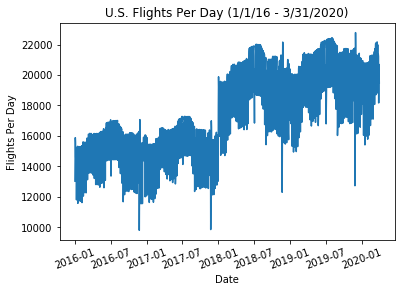

In [14]:
thang = all_df.groupby(all_df.index).count()

plt.plot(thang.index, thang['weather_id'])

plt.title('U.S. Flights Per Day (1/1/16 - 3/31/2020)')

plt.xlabel('Date')

plt.ylabel('Flights Per Day')
plt.xticks(rotation = 20)

plt.savefig('US_flights_per_day.png')

In [15]:
flights_perday_df = pd.DataFrame(all_df.groupby(all_df.index).count())




In [16]:
max_day_val = flights_perday_df.weather_id.max()

In [17]:
max_day = flights_perday_df['weather_id'].idxmax()

In [18]:
flights_perday_df.head(31)

Unnamed: 0  OP_UNIQUE_CARRIER  ORIGIN  ORIGIN_CITY_NAME   DEST  \
DATE                                                                         
2016-01-01       13019              13019   13019             13019  13019   
2016-01-02       14869              14869   14869             14869  14869   
2016-01-03       15878              15878   15878             15878  15878   
2016-01-04       15570              15570   15570             15570  15570   
2016-01-05       14582              14582   14582             14582  14582   
2016-01-06       14683              14683   14683             14683  14683   
2016-01-07       15193              15193   15193             15193  15193   
2016-01-08       15228              15228   15228             15228  15228   
2016-01-09       11791              11791   11791             11791  11791   
2016-01-10       13988              13988   13988             13988  13988   
2016-01-11       15174              15174   15174             15174  15174   
2016-01-12       14566              14566   14566             14566  14566   
2016-01-13       14800              14800   14800             14800  14800   
2016-01-14       15295              15295   15295             15295  15295   
2016-01-15       15308              15308   15308             15308  15308   
2016-01-16       11563              11563   11563             11563  11563   
2016-01-17       12970              12970   12970             12970  12970   
2016-01-18       15107              15107   15107             15107  15107   
2016-01-19       14580              14580   14580             14580  14580   
2016-01-20       14790              14790   14790             14790  14790   
2016-01-21       15285              15285   15285             15285  15285   
2016-01-22       15290              15290   15290             15290  15290   
2016-01-23       11732              11732   11732             11732  11732   
2016-01-24       14001              14001   14001             14001  14001   
2016-01-25       15177              15177   15177             15177  15177   
2016-01-26       14545              14545   14545             14545  14545   
2016-01-27       14763              14763   14763             14763  14763   
2016-01-28       15271              15271   15271             15271  15271   
2016-01-29       15293              15293   15293             15293  15293   
2016-01-30       11699              11699   11699             11699  11699   
2016-01-31       13817              13817   13817             13817  13817   

            DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  \
DATE                                                                    
2016-01-01           13019      12965     12961      12954      13019   
2016-01-02           14869      14824     14814      14796      14869   
2016-01-03           15878      15787     15776      15757      15878   
2016-01-04           15570      15489     15482      15470      15570   
2016-01-05           14582      14385     14348      14337      14582   
2016-01-06           14683      14451     14433      14407      14683   
2016-01-07           15193      15035     15010      14983      15193   
2016-01-08           15228      15052     15025      14965      15228   
2016-01-09           11791      11651     11639      11617      11791   
2016-01-10           13988      13841     13816      13755      13988   
2016-01-11           15174      15071     15060      15043      15174   
2016-01-12           14566      14475     14464      14450      14566   
2016-01-13           14800      14724     14714      14702      14800   
2016-01-14           15295      15206     15194      15178      15295   
2016-01-15           15308      15277     15260      15191      15308   
2016-01-16           11563      11490     11476      11460      11563   
2016-01-17           12970      12894     12887      12878      12970   
2016-01-18           15107      15038     15029   

In [19]:
flights_perday_df.groupby(pd.Grouper(freq= 'M')).mean()

Unnamed: 0  OP_UNIQUE_CARRIER        ORIGIN  ORIGIN_CITY_NAME  \
DATE                                                                          
2016-01-31  14381.516129       14381.516129  14381.516129      14381.516129   
2016-02-29  14616.862069       14616.862069  14616.862069      14616.862069   
2016-03-31  15455.548387       15455.548387  15455.548387      15455.548387   
2016-04-30  15387.666667       15387.666667  15387.666667      15387.666667   
2016-05-31  15463.161290       15463.161290  15463.161290      15463.161290   
2016-06-30  16254.566667       16254.566667  16254.566667      16254.566667   
2016-07-31  16208.290323       16208.290323  16208.290323      16208.290323   
2016-08-31  16075.709677       16075.709677  16075.709677      16075.709677   
2016-09-30  15162.600000       15162.600000  15162.600000      15162.600000   
2016-10-31  15246.000000       15246.000000  15246.000000      15246.000000   
2016-11-30  15031.266667       15031.266667  15031.266667      15031.266667   
2016-12-31  14869.322581       14869.322581  14869.322581      14869.322581   
2017-01-31  14516.677419       14516.677419  14516.677419      14516.677419   
2017-02-28  14661.321429       14661.321429  14661.321429      14661.321429   
2017-03-31  15761.193548       15761.193548  15761.193548      15761.193548   
2017-04-30  15610.966667       15610.966667  15610.966667      15610.966667   
2017-05-31  15693.000000       15693.000000  15693.000000      15693.000000   
2017-06-30  16475.533333       16475.533333  16475.533333      16475.533333   
2017-07-31  16421.612903       16421.612903  16421.612903      16421.612903   
2017-08-31  16466.161290       16466.161290  16466.161290      16466.161290   
2017-09-30  15290.900000       15290.900000  15290.900000      15290.900000   
2017-10-31  15477.322581       15477.322581  15477.322581      15477.322581   
2017-11-30  15138.733333       15138.733333  15138.733333      15138.733333   
2017-12-31  14974.354839       14974.354839  14974.354839      14974.354839   
2018-01-31  18390.903226       18390.903226  18390.903226      18390.903226   
2018-02-28  18597.535714       18597.535714  18597.535714      18597.535714   
2018-03-31  19741.516129       19741.516129  19741.516129      19741.516129   
2018-04-30  19868.200000       19868.200000  19868.200000      19868.200000   
2018-05-31  19888.032258       19888.032258  19888.032258      19888.032258   
2018-06-30  20873.100000       20873.100000  20873.100000      20873.100000   
2018-07-31  20816.096774       20816.096774  20816.096774      20816.096774   
2018-08-31  20795.903226       20795.903226  20795.903226      20795.903226   
2018-09-30  19524.966667       19524.966667  19524.966667      19524.966667   
2018-10-31  19874.225806       19874.225806  19874.225806      19874.225806   
2018-11-30  19539.266667       19539.266667  19539.266667      19539.266667   
2018-12-31  19156.193548       19156.193548  19156.193548      19156.193548   
2019-01-31  18838.225806       18838.225806  18838.225806      18838.225806   
2019-02-28  19041.964286       19041.964286  19041.964286      19041.964286   
2019-03-31  20389.483871       20389.483871  20389.483871      20389.483871   
2019-04-30  20400.766667       20400.766667  20400.766667      20400.766667   
2019-05-31  20528.709677       20528.709677  20528.709677      20528.709677   
2019-06-30  21223.033333       21223.033333  21223.033333      21223.033333   
2019-07-31  21259.000000       21259.000000  21259.000000      21259.000000   
2019-08-31  21240.677419       21240.677419  21240.677419      21240.677419   
2019-09-30  20199.300000       20199.300000  20199.300000      20199.300000   
2019-10-31  20516.580645       20516.580645  20516.580645      20516.580645   
2019-11-30  20081.766667       20081.766667  20081.766667      20081.766667   
2019-12-31  20185.903226       20185.903226  20185.903226      20185.903226   
2020-01-31  19591.806452       19591.806452  19591.806452      1

(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241., 737425.]),
 <a list of 9 Text xticklabel objects>)

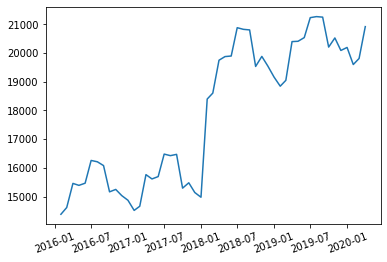

In [20]:
avg_flights_per_day = flights_perday_df.groupby(pd.Grouper(freq= 'M')).mean()

plt.plot(avg_flights_per_day.index, avg_flights_per_day.weather_id)

plt.xticks(rotation = 20)

In [21]:
#forget this one?

#highest_monthly avg = avg_flights_per_day.weather_id.max()

In [22]:
flights_by_month = all_df.groupby(pd.Grouper(freq= 'M')).count()

In [23]:
max_month_val = flights_by_month.weather_id.max()

max_month_val

659029

In [24]:
max_month = flights_by_month.weather_id.idxmax()

max_month

Timestamp('2019-07-31 00:00:00', freq='M')

In [25]:
'''a = pd.to_datetime('01/01/2016')
b = pd.to_datetime('01/01/2017')
c = pd.to_datetime('01/01/2018')
d = pd.to_datetime('01/01/2019')
e = pd.to_datetime('01/01/2020')



#for i in flights_by_month: '''










"a = pd.to_datetime('01/01/2016')\nb = pd.to_datetime('01/01/2017')\nc = pd.to_datetime('01/01/2018')\nd = pd.to_datetime('01/01/2019')\ne = pd.to_datetime('01/01/2020')\n\n\n\n#for i in flights_by_month: "

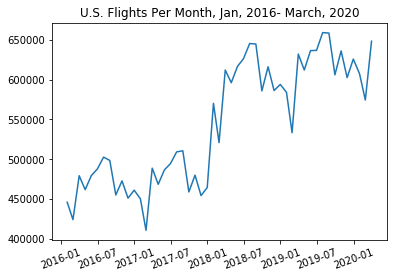

In [26]:
plt.plot(flights_by_month.index, flights_by_month.weather_id)

plt.title('U.S. Flights Per Month, Jan, 2016- March, 2020')

plt.xticks(rotation = 20)

plt.savefig('US_flights_per_month.png')





In [27]:
less_2020 = pd.to_datetime('01-01-2020')

no_2020 = pd.DataFrame(all_df.loc[all_df.index < less_2020])

In [28]:
less_2020

Timestamp('2020-01-01 00:00:00')

In [29]:

flights_by_year = no_2020.groupby(pd.Grouper(freq= 'Y')).count()

flights_by_year

Unnamed: 0  OP_UNIQUE_CARRIER   ORIGIN  ORIGIN_CITY_NAME     DEST  \
DATE                                                                            
2016-12-31     5617658            5617658  5617658           5617658  5617658   
2017-12-31     5674621            5674621  5674621           5674621  5674621   
2018-12-31     7213446            7213446  7213446           7213446  7213446   
2019-12-31     7422037            7422037  7422037           7422037  7422037   

            DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  \
DATE                                                                    
2016-12-31         5617658    5554202   5549814    5538145    5617658   
2017-12-31         5674621    5594278   5589947    5579410    5674621   
2018-12-31         7213446    7096212   7094201    7076406    7213446   
2019-12-31         7422037    7291927   7284391    7268232    7422037   

            weather_id  
DATE                    
2016-12-31     5617658  
2017-12-31     5674621  
2018-12-31     7213446  
2019-12-31     7422037

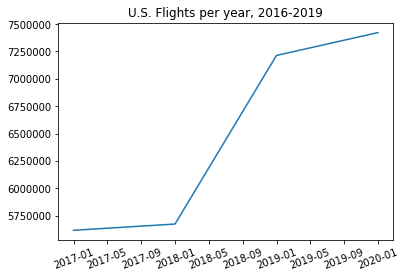

In [30]:


#flights_by_year = no_2020.groupby(pd.Grouper(freq= 'Y')).count()

plt.plot(flights_by_year.index, flights_by_year.weather_id)

plt.title('U.S. Flights per year, 2016-2019')

plt.xticks(rotation = 20)

plt.savefig('US_flights_per_year.png')

In [31]:
cle_df = pd.DataFrame(all_df.loc[(all_df['ORIGIN'] == 'CLE')| (all_df['DEST'] == 'CLE')])

In [32]:
len(cle_df)

358033

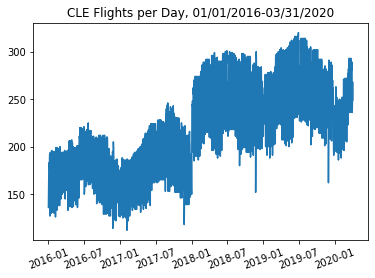

In [33]:
thangthang = cle_df.groupby(cle_df.index).count()

plt.plot(thangthang.index, thangthang['weather_id'])

plt.title('CLE Flights per Day, 01/01/2016-03/31/2020')

plt.xticks(rotation = 20)

plt.savefig('CLE_flights_per_day.png')

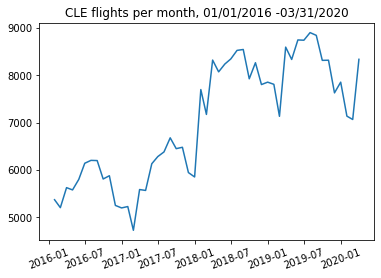

In [34]:
cle_flights_by_month = cle_df.groupby(pd.Grouper(freq= 'M')).count()

plt.plot(cle_flights_by_month.index, cle_flights_by_month.weather_id)

plt.title('CLE flights per month, 01/01/2016 -03/31/2020')

plt.xticks(rotation = 20)

plt.savefig('CLE_flights_per_month.png')

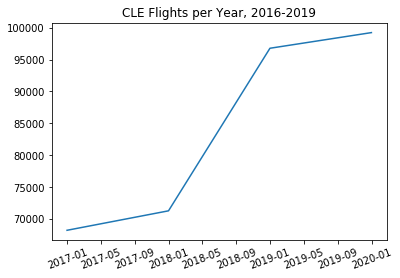

In [35]:
cle_no_2020 = pd.DataFrame(cle_df.loc[cle_df.index < less_2020])


cle_flights_by_year = cle_no_2020.groupby(pd.Grouper(freq= 'Y')).count()

plt.plot(cle_flights_by_year.index, cle_flights_by_year.weather_id)

plt.title('CLE Flights per Year, 2016-2019')

plt.xticks(rotation = 20)

plt.savefig('CLE_flights_per_year.png')

In [36]:
all_df['day'] = all_df.index.day
all_df['month'] = all_df.index.month
all_df['year'] = all_df.index.year

all_df = all_df[['year','month', 'day','OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST' , 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'weather_id']]

all_df.head()

year  month  day OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME DEST  \
DATE                                                                          
2016-04-11  2016      4   11                AA    BOS       Boston, MA  ORD   
2016-04-12  2016      4   12                AA    BOS       Boston, MA  ORD   
2016-04-13  2016      4   13                AA    BOS       Boston, MA  ORD   
2016-04-14  2016      4   14                AA    BOS       Boston, MA  ORD   
2016-04-15  2016      4   15                AA    BOS       Boston, MA  ORD   

           DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  \
DATE                                                                   
2016-04-11    Chicago, IL       -4.0    1406.0       -5.0        0.0   
2016-04-12    Chicago, IL       -7.0    1350.0      -21.0        0.0   
2016-04-13    Chicago, IL       -4.0    1350.0      -21.0        0.0   
2016-04-14    Chicago, IL       -8.0    1341.0      -30.0        0.0   
2016-04-15    Chicago, IL       -3.0    1405.0       -6.0        0.0   

                  weather_id  
DATE                          
2016-04-11  04/11/16_BOS_ORD  
2016-04-12  04/12/16_BOS_ORD  
2016-04-13  04/13/16_BOS_ORD  
2016-04-14  04/14/16_BOS_ORD  
2016-04-15  04/15/16_BOS_ORD

In [37]:
#all_df.set_index(['year', 'month'], inplace = True)

In [38]:
#all_df.head()

In [39]:
#pop_months = all_df.groupby('month').count()

In [40]:
#pop_months.plot(kind = 'bar')

In [41]:
no_2020['day'] = no_2020.index.day
no_2020['month'] = no_2020.index.month
no_2020['year'] = no_2020.index.year

no_2020 = no_2020[['year','month', 'day','OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST' , 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'weather_id']]



In [42]:
no_2020.set_index(['year', 'month'], inplace = True)

In [131]:
pop_months = (no_2020.groupby('month').count()['weather_id']) / 4

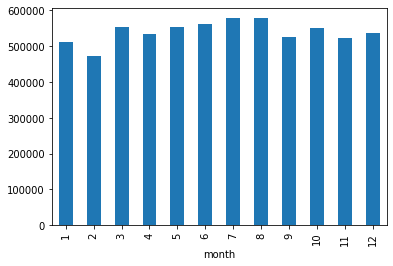

In [133]:
pop_months.plot(kind = 'bar')

In [45]:
no_2020.groupby('year').count()

day  OP_UNIQUE_CARRIER   ORIGIN  ORIGIN_CITY_NAME     DEST  \
year                                                                   
2016  5617658            5617658  5617658           5617658  5617658   
2017  5674621            5674621  5674621           5674621  5674621   
2018  7213446            7213446  7213446           7213446  7213446   
2019  7422037            7422037  7422037           7422037  7422037   

      DEST_CITY_NAME  DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  weather_id  
year                                                                         
2016         5617658    5554202   5549814    5538145    5617658     5617658  
2017         5674621    5594278   5589947    5579410    5674621     5674621  
2018         7213446    7096212   7094201    7076406    7213446     7213446  
2019         7422037    7291927   7284391    7268232    7422037     7422037

In [46]:
no_2020.groupby(['month','day']).count()

OP_UNIQUE_CARRIER  ORIGIN  ORIGIN_CITY_NAME   DEST  DEST_CITY_NAME  \
month day                                                                       
1     1                62912   62912             62912  62912           62912   
      2                71014   71014             71014  71014           71014   
      3                69941   69941             69941  69941           69941   
      4                69126   69126             69126  69126           69126   
      5                65653   65653             65653  65653           65653   
...                      ...     ...               ...    ...             ...   
12    27               73849   73849             73849  73849           73849   
      28               72622   72622             72622  72622           72622   
      29               72200   72200             72200  72200           72200   
      30               72169   72169             72169  72169           72169   
      31               59491   59491             59491  59491           59491   

           DEP_DELAY  ARR_TIME  ARR_DELAY  CANCELLED  weather_id  
month day                                                         
1     1        62314     62277      62201      62912       62912  
      2        70184     70157      69990      71014       71014  
      3        68738     68704      68564      69941       69941  
      4        64914     64828      64725      69126       69126  
      5        63724     63644      63541      65653       65653  
...              ...       ...        ...        ...         ...  
12    27       72740     72662      72529      73849       73849  
      28       71727     71629      71477      72622       72622  
      29       71617     71536      71366      72200       72200  
      30       71681     71597      71460      72169       72169  
      31       59052     58992      58878      59491       59491  

[366 rows x 10 columns]

In [47]:
all_df.groupby(pd.Grouper(freq ='D')).count().idxmin()

year                2016-11-24
month               2016-11-24
day                 2016-11-24
OP_UNIQUE_CARRIER   2016-11-24
ORIGIN              2016-11-24
ORIGIN_CITY_NAME    2016-11-24
DEST                2016-11-24
DEST_CITY_NAME      2016-11-24
DEP_DELAY           2016-01-23
ARR_TIME            2016-01-23
ARR_DELAY           2016-01-23
CANCELLED           2016-11-24
weather_id          2016-11-24
dtype: datetime64[ns]

In [48]:
all_df.set_index(['year', 'month'], inplace = True)

In [66]:
year_totals = all_df.groupby(['year']).count()

In [98]:
all_df.groupby(['year','month']).count()['day']

year  month
2016  1        445827
      2        423889
      3        479122
      4        461630
      5        479358
      6        487637
      7        502457
      8        498347
      9        454878
      10       472626
      11       450938
      12       460949
2017  1        450017
      2        410517
      3        488597
      4        468329
      5        486483
      6        494266
      7        509070
      8        510451
      9        458727
      10       479797
      11       454162
      12       464205
2018  1        570118
      2        520731
      3        611987
      4        596046
      5        616529
      6        626193
      7        645299
      8        644673
      9        585749
      10       616101
      11       586178
      12       593842
2019  1        583985
      2        533175
      3        632074
      4        612023
      5        636390
      6        636691
      7        659029
      8        658461
      9        60597

In [110]:
monthly_avg = (no_2020.groupby(['year'])['weather_id'].count()) / 12

daily_avg = (no_2020.groupby(['year'])['weather_id'].count()) / 365



In [118]:
biggest_id = all_df.groupby(['year','month']).count()['day'].idxmax()

biggest_val = all_df.groupby(['year','month']).count()['day'].max()

top_month = f" The most flights occured {biggest_id[1]},{biggest_id[0]} and was {biggest_val} flights"

big_year_id = no_2020.groupby('year').count()['day'].idxmax()

big_year_val = no_2020.groupby('year').count()['day'].max()

top_year = f" The most flights per year occured {big_year_id[1]},{big_year_id[0]} and was {big_year_val} flights"
           

In [116]:
top_month

' The most flights occured 7,2019 and was 659029 flights'

In [120]:
top_year = f" The most flights per year occured {big_year_id}, and was {big_year_val} flights"

top_year

' The most flights per year occured 2019, and was 7422037 flights'

In [105]:
year_totals = year_totals.iloc[:,1]

monthly_avg

daily_avg




In [123]:
all_df.groupby(['year','month']).count()['day']

year  month
2016  1        445827
      2        423889
      3        479122
      4        461630
      5        479358
      6        487637
      7        502457
      8        498347
      9        454878
      10       472626
      11       450938
      12       460949
2017  1        450017
      2        410517
      3        488597
      4        468329
      5        486483
      6        494266
      7        509070
      8        510451
      9        458727
      10       479797
      11       454162
      12       464205
2018  1        570118
      2        520731
      3        611987
      4        596046
      5        616529
      6        626193
      7        645299
      8        644673
      9        585749
      10       616101
      11       586178
      12       593842
2019  1        583985
      2        533175
      3        632074
      4        612023
      5        636390
      6        636691
      7        659029
      8        658461
      9        60597

In [125]:
minall_df.groupby(['year','month']).count()['weather_id'].idxmin()

(2017, 2)

In [135]:
cle_df.groupby(pd.Grouper(freq = 'Y')).count()['weather_id']

DATE
2016-12-31    68220
2017-12-31    71272
2018-12-31    96774
2019-12-31    99228
2020-12-31    22539
Freq: A-DEC, Name: weather_id, dtype: int64

In [141]:
all_df.groupby('year').count()['weather_id']

all_df.groupby('year').count()['weather_id'].idxmax()

2019

In [142]:
cle_df.count()['weather_id']



AttributeError: 'numpy.int64' object has no attribute 'idxmax'

In [138]:
all_df.count()['weather_id']

27757609

In [145]:
cle_df.groupby(pd.Grouper(freq = 'D')).count()['weather_id'].idxmin()

Timestamp('2017-02-04 00:00:00', freq='D')

In [148]:
flights_perday_df.groupby(pd.Grouper(freq='Y')).idxmin()['weather_id']

DATE
2016-12-31   2016-11-24
2017-12-31   2017-11-23
2018-12-31   2018-11-22
2019-12-31   2019-11-28
2020-12-31   2020-01-18
Name: weather_id, dtype: datetime64[ns]

In [159]:
flights_perday_df.groupby(pd.Grouper(freq='Y')).min()['weather_id']

DATE
2016-12-31     9791
2017-12-31     9839
2018-12-31    12290
2019-12-31    12719
2020-12-31    15404
Freq: A-DEC, Name: weather_id, dtype: int64

In [150]:
feb4 = pd.to_datetime('2017-02-04')

feb3 = pd.to_datetime('2017-02-03')

feb5 = pd.to_datetime('2017-02-05')

In [179]:
cle_2017 = pd.DataFrame(cle_df.loc[cle_df.index == '2017'])

In [185]:
cle_2017.count().mean()


148.0